In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

path ='/content/gdrive/MyDrive/Colab Notebooks/My_Data/OnlineRetail.csv'




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
#from _future_ import division
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go

data = pd.read_csv(path,header= 0,
                        encoding= 'unicode_escape')
print(data.shape)
data.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##Customer Segmentation using RFM
##R: Recency
##F: Frequecy
##M: Monetary
##Method: Clustering by KMean --> Visualization

## Prepare and Clean Data

In [55]:
## convert Invoice date from object to datetime

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [56]:
##Check country data
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [57]:
##There are more than 90% of entry came from United Kingdom, so only need to investigate only United Kingdom

data_uk = data.query("Country == 'United Kingdom'").reset_index(drop=True)
#data_uk.head()

## Recency

In [58]:
##Get the data for the second quarter of 2011 (from March to June)

#The invoice date has time, we need to get date only to filter
data_uk['InvoiceDate'] = pd.to_datetime(data_uk['InvoiceDate']).dt.date
#get the second quarter
data_3m = data_uk[(data_uk.InvoiceDate < date(2011,6,1)) & (data_uk.InvoiceDate >= date(2011,3,1))].reset_index()
data_3m.shape

(95193, 9)

In [59]:
## Get the unique customer to identify customer recency

data_user = pd.DataFrame(data_3m['CustomerID'].unique())
data_user.columns = ['CustomerID']
#data_user

In [60]:
##Find the latest date that a customer made a purchase in the second quarter

data_max_purchase_date = data_3m.groupby('CustomerID').InvoiceDate.max().reset_index()
data_max_purchase_date.columns = ['CustomerID', 'MaxPurchaseDate']
#data_max_purchase_date

In [61]:
## Get the recency - the number of days from the max latest day a customer make a purchase subtract the all latest date all customer make purchases
## And only get date
data_max_purchase_date['Recency'] = (data_max_purchase_date['MaxPurchaseDate'].max()- data_max_purchase_date['MaxPurchaseDate']).dt.days
data_max_purchase_date


,CustomerID,MaxPurchaseDate,Recency
0,12747.0,2011-05-25,6
1,12748.0,2011-05-31,0
2,12749.0,2011-05-23,8
3,12821.0,2011-05-09,22
4,12823.0,2011-03-30,62
...,...,...,...
1835,18272.0,2011-05-11,20
1836,18273.0,2011-03-27,65
1837,18280.0,2011-03-07,85
1838,18283.0,2011-05-23,8


In [62]:
# Merge data_user and recency 

data_user = pd.merge(data_user, data_max_purchase_date[['CustomerID','Recency']], on ='CustomerID')
data_user

,CustomerID,Recency
0,14620.0,12
1,14740.0,5
2,13880.0,25
3,16462.0,91
4,17068.0,12
...,...,...
1835,14819.0,0
1836,18190.0,0
1837,15163.0,0
1838,18204.0,0


In [63]:
data_user.Recency.describe()

count    1840.000000
mean       35.338043
std        26.220317
min         0.000000
25%        12.000000
50%        26.000000
75%        56.000000
max        91.000000
Name: Recency, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

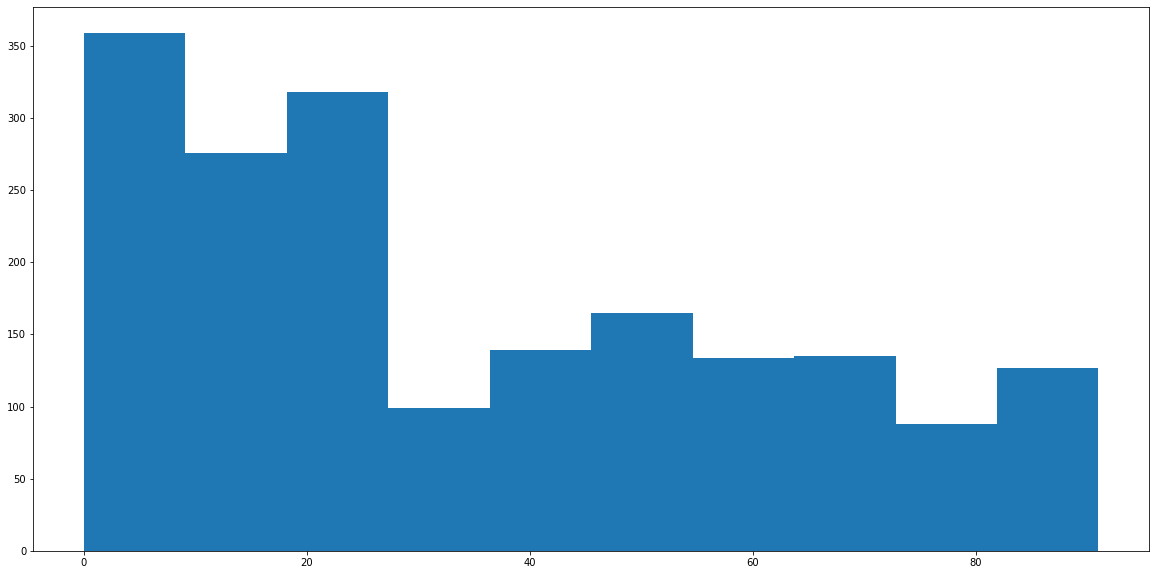

In [64]:
#Visualize the recency
plt.figure(figsize=(20,10))
plt.hist(data_user.Recency)
plt.show

K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

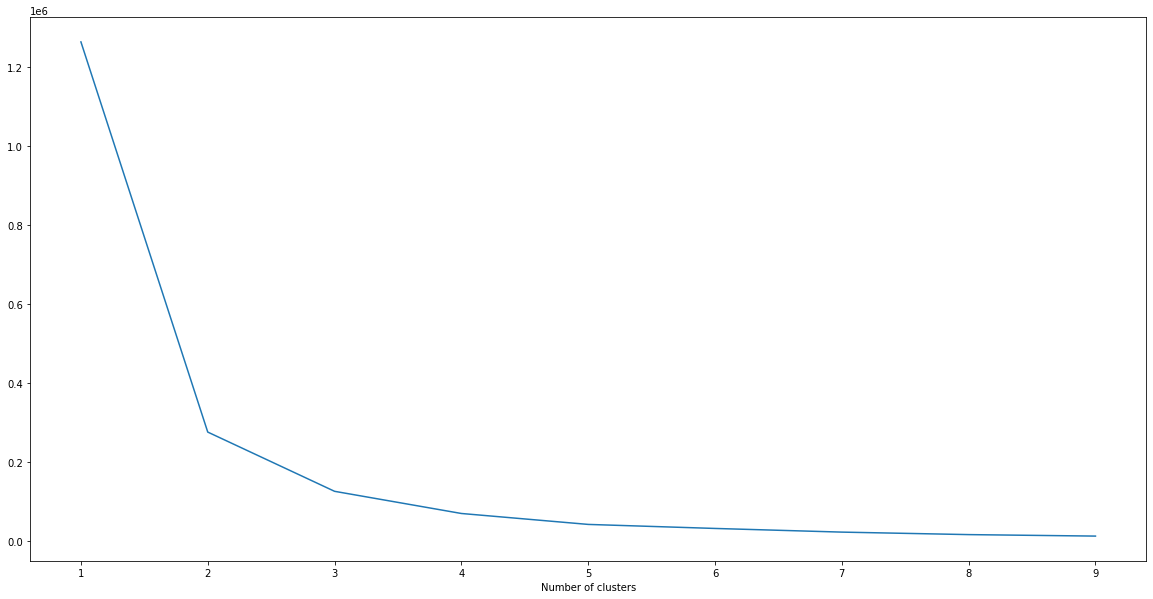

In [65]:
sse = {}
data_recency = data_user[['Recency']]
for k in range(1,10):
  kmeans = KMeans(n_clusters = k, max_iter=1000).fit(data_recency)
  data_recency['Cluster Label'] = kmeans.labels_ #add label for data of recency after clustering
  sse[k] = kmeans.inertia_ #get intertia to evaluate perfomance of model

plt.figure(figsize =(20,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()


In [66]:
#choose the number of clusters is 4

kmeans = KMeans(n_clusters =4)
kmeans.fit(data_user[['Recency']])

data_user['RecencyCluster'] = kmeans.predict(data_user[['Recency']])
#data_user

In [67]:
##Check recency and the cluster label
data_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,444.0,24.581081,4.960358,18.0,20.0,23.0,27.00,35.0
1,350.0,77.017143,8.385398,64.0,70.0,76.0,84.75,91.0
2,438.0,50.189498,7.298674,40.0,43.0,49.0,56.00,63.0
3,608.0,8.501645,4.397843,0.0,5.0,8.0,12.00,16.0


In [68]:
# Re-arrange the recency and labels so label 0 is for group of data with longest recency and group 4 will be the shortes

data_new = data_user.groupby('RecencyCluster')['Recency'].mean().reset_index()
data_new = data_new.sort_values(by='Recency', ascending=False).reset_index(drop=True)
data_new['Index']= data_new.index
data_new


,RecencyCluster,Recency,Index
0,1,77.017143,0
1,2,50.189498,1
2,0,24.581081,2
3,3,8.501645,3


In [69]:
#merge back to data user to re-arrange the label

data_user = pd.merge(data_user, data_new[['RecencyCluster','Index']], on='RecencyCluster')

#The index in data_new is actually the new cluster label for re-arrange, so we frop the Recency Cluster then set the index is the new label

data_user = data_user.drop(['RecencyCluster'], axis=1)
data_user = data_user.rename(columns={'Index':'RecencyCluster'})

data_user

,CustomerID,Recency,RecencyCluster
0,14620.0,12,3
1,14740.0,5,3
2,17068.0,12,3
3,12971.0,4,3
4,15194.0,6,3
...,...,...,...
1835,13482.0,40,1
1836,13862.0,40,1
1837,14512.0,40,1
1838,15810.0,40,1


## Frequency

In [70]:
#Count the number time a customer make an order

data_freq = data_3m.groupby('CustomerID').InvoiceDate.count().reset_index()
data_freq.columns = ['CustomerID','Frequency']
#data_freq

In [71]:
#merge frequency data to user data

data_user = pd.merge(data_user, data_freq, on = 'CustomerID')
data_user.Frequency.describe()

count    1840.000000
mean       38.958152
std        60.968929
min         1.000000
25%        12.000000
50%        23.000000
75%        47.000000
max      1364.000000
Name: Frequency, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

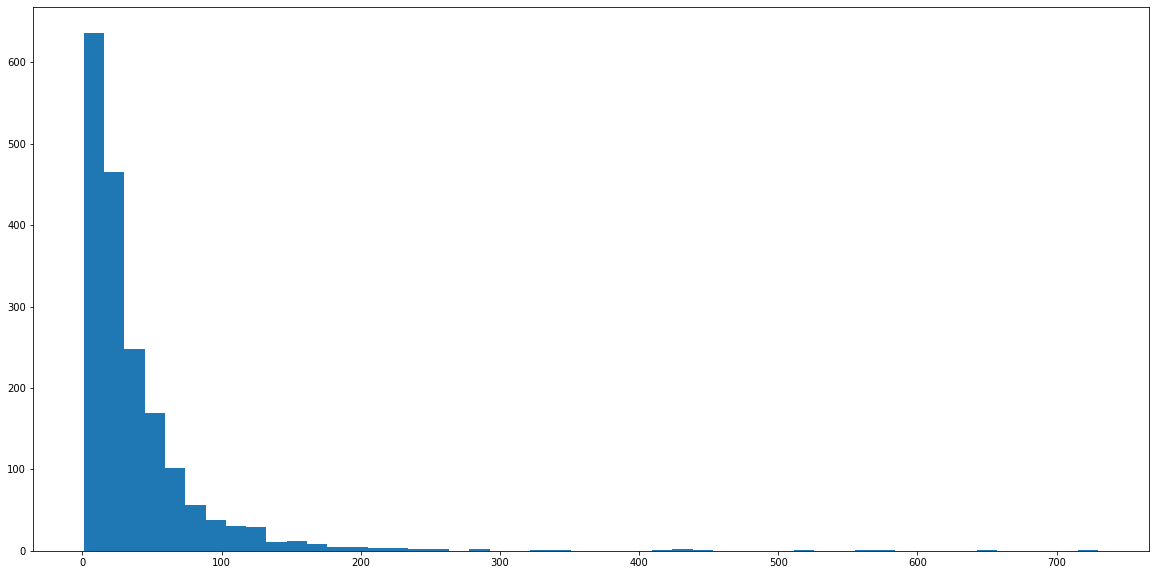

In [72]:
#Visualize the data
#Most customer make less than 200 orders in the second quarter
plt.figure(figsize=(20,10))
plt.hist(x=data_user.query('Frequency <1000')['Frequency'], bins=50)
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

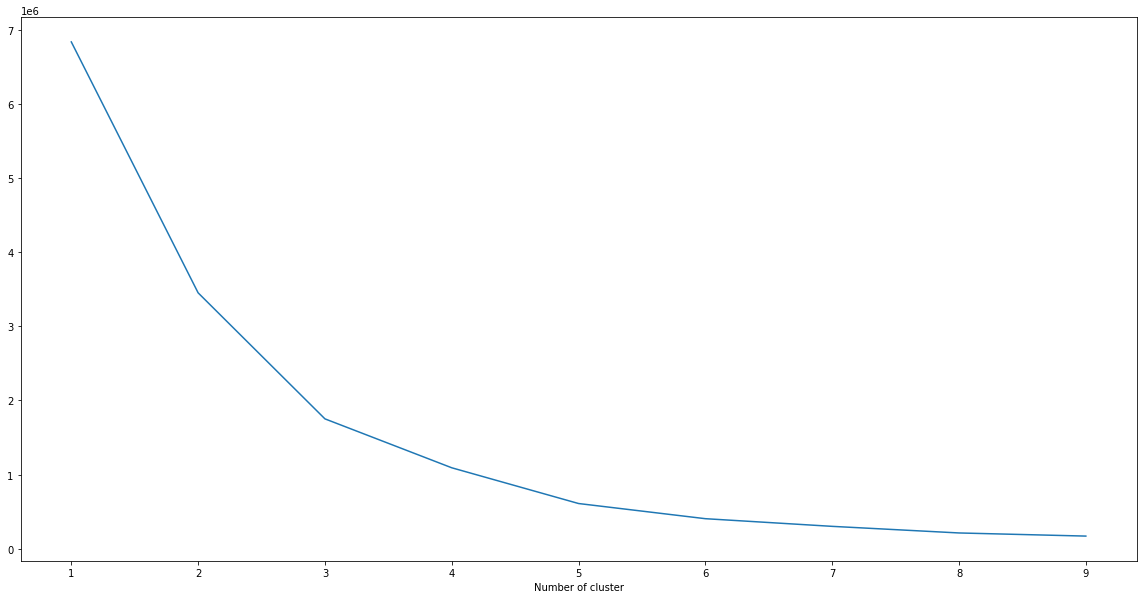

In [73]:
# Clustering 

sse = {}

data_frequency = data_user[['Frequency']]

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_frequency)
  data_frequency['Clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_

plt.figure(figsize = (20,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [74]:
#use the number of cluster =4 for the clustering

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_user[['Frequency']])
data_user['FrequencyCluster'] = kmeans.predict(data_user[['Frequency']])
data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,14620.0,12,3,30,0
1,14740.0,5,3,89,2
2,17068.0,12,3,76,2
3,12971.0,4,3,73,2
4,15194.0,6,3,64,0
...,...,...,...,...,...
1835,13482.0,40,1,11,0
1836,13862.0,40,1,11,0
1837,14512.0,40,1,14,0
1838,15810.0,40,1,32,0


## Re-arrange cluster labels of frequency
**Notice that cluster labels of recency in desecending order, which mean group 3 is the lowest, or they are most active user**

**Same logic as Recency, so cluster labels have to be ordered in ascending order, order group 3 is the highest or they make the most orders, or they are the most active user**

In [75]:
data_new = data_user.groupby('FrequencyCluster')['Frequency'].mean().reset_index()
data_new = data_new.sort_values(by = 'Frequency', ascending =True).reset_index(drop=True)
data_new['index'] = data_new.index
data_new

,FrequencyCluster,Frequency,index
0,0,24.218069,0
1,2,116.560538,1
2,3,496.000000,2
3,1,1364.000000,3


In [76]:
data_user = pd.merge(data_user, data_new[['FrequencyCluster','index']], on = 'FrequencyCluster')
data_user = data_user.drop(['FrequencyCluster'], axis=1)
data_user = data_user.rename(columns={'index': 'FrequencyCluster'})
data_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,14620.0,12,3,30,0
1,15194.0,6,3,64,0
2,18044.0,6,3,57,0
3,18075.0,12,3,35,0
4,15241.0,0,3,64,0
...,...,...,...,...,...
1835,12748.0,0,3,582,2
1836,14056.0,5,3,331,2
1837,14769.0,9,3,558,2
1838,14298.0,27,2,433,2


## Monetary
**Revenue = unit price * quantity**

In [77]:
#calculate revenue

data_3m['Revenue'] = data_3m['UnitPrice']*data_3m['Quantity']

data_revenue = data_3m.groupby('CustomerID').Revenue.sum().reset_index()
data_user = pd.merge(data_user,data_revenue, on='CustomerID')
data_user.Revenue.describe()

count     1840.000000
mean       738.715017
std       1640.430156
min      -1462.500000
25%        210.237500
50%        369.825000
75%        749.490000
max      35085.480000
Name: Revenue, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

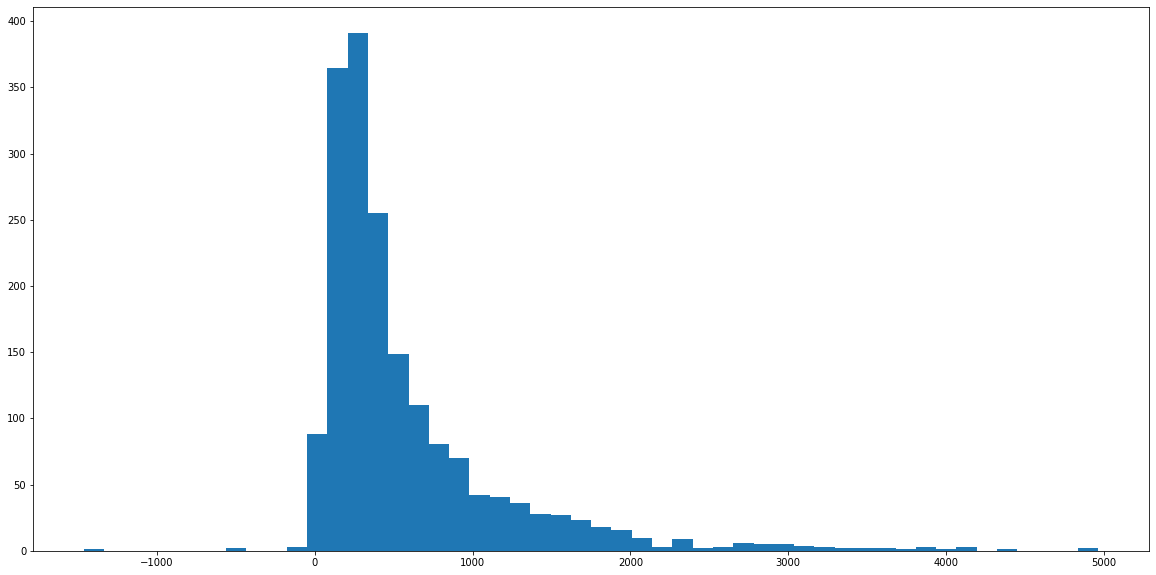

In [78]:
#visualize data
#most revenue per customer are less than 1000
plt.figure(figsize=(20,10))
plt.hist(x=data_user.query('Revenue <5000')['Revenue'], bins=50)
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

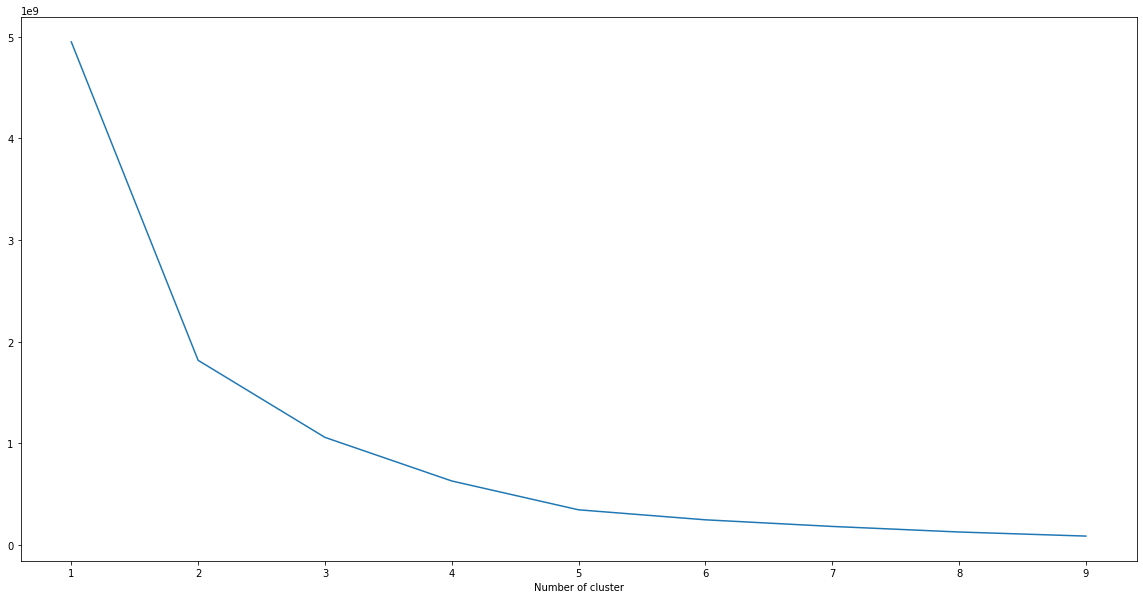

In [79]:
#Clustering monetary value

sse ={}

data_revenue = data_user[['Revenue']]

for k in range (1,10):
  kmeans = KMeans(n_clusters=k,max_iter=1000).fit(data_revenue)
  data_revenue['Cluster'] = kmeans.labels_
  sse[k] = kmeans.inertia_

plt.figure(figsize=(20,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()



In [80]:
# use number of cluster is 4

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_user[['Revenue']])
data_user['RevenueCluster'] = kmeans.predict(data_user[['Revenue']])


**Re-arrange labels in ascending order with the same logic as frequency, group 3 has highest moneytary value**

In [81]:
data_new = data_user.groupby('RevenueCluster')['Revenue'].mean().reset_index()
data_new = data_new.sort_values(by='Revenue', ascending=True).reset_index(drop=True)
data_new['Index'] = data_new.index

data_new

,RevenueCluster,Revenue,Index
0,0,504.760245,0
1,2,3760.423486,1
2,1,14092.686000,2
3,3,30599.645000,3


In [82]:
data_user = pd.merge(data_user, data_new[['RevenueCluster','Index']], on='RevenueCluster')
data_user = data_user.drop(['RevenueCluster'],axis=1)
data_user = data_user.rename(columns={'Index':'RevenueCluster'})

data_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1756.0,504.760245,444.567580,-1462.50,204.3075,349.590,666.8325,2131.72
1,72.0,3760.423486,1538.877714,2159.16,2685.1875,3141.610,4222.5050,7969.99
2,10.0,14092.686000,2855.109881,10348.13,11268.3675,15124.345,16124.8250,17700.64
3,2.0,30599.645000,6343.928696,26113.81,28356.7275,30599.645,32842.5625,35085.48


## Overall Segmentation

In [83]:
data_user['Overall_score'] = data_user['RecencyCluster'] + data_user['FrequencyCluster']+ data_user['RevenueCluster']
data_user.groupby('Overall_score')['Recency','Frequency','Revenue'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
Overall_score,,,
0,77.145833,18.485119,295.299613
1,51.057416,24.495215,367.926962
2,26.792857,31.028571,500.973095
3,10.434959,36.652439,633.871402
4,8.304688,103.835938,1983.985086
5,6.758621,138.965517,4326.155172
6,7.428571,322.071429,12177.627143
7,3.000000,779.333333,11350.896667


**Grouping customer base on overall score into 3 groups: Low value, Mid-value, High value**

In [84]:
data_user['Segment'] = 'Low_Value'
data_user.loc[data_user['Overall_score'] > 2, 'Segment'] = 'Mid_Value'
data_user.loc[data_user['Overall_score'] > 4, 'Segment'] = 'High_Value'
data_user


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,Overall_score,Segment
0,14620.0,12,3,30,0,393.28,0,3,Mid_Value
1,15194.0,6,3,64,0,1439.02,0,3,Mid_Value
2,18044.0,6,3,57,0,808.96,0,3,Mid_Value
3,18075.0,12,3,35,0,638.12,0,3,Mid_Value
4,15241.0,0,3,64,0,947.55,0,3,Mid_Value
...,...,...,...,...,...,...,...,...,...
1835,17511.0,14,3,199,1,17307.53,2,6,High_Value
1836,16684.0,13,3,73,1,15263.96,2,6,High_Value
1837,15311.0,4,3,522,2,16309.61,2,7,High_Value
1838,13089.0,5,3,452,2,11757.87,2,7,High_Value


##Visualization

**Frequency vs Revenue**

In [85]:
data_graph = data_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x = data_graph.query("Segment == 'Low_Value'")['Frequency'],
        y = data_graph.query("Segment == 'Low_Value'")['Revenue'],
        mode ='markers',
        name ='Low',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='blue',
                     opacity=0.8
                     )



    ),
     go.Scatter(
        x = data_graph.query("Segment == 'Mid_Value'")['Frequency'],
        y = data_graph.query("Segment == 'Mid_Value'")['Revenue'],
        mode ='markers',
        name ='Mid',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='green',
                     opacity=0.5
                     )
     ),

     go.Scatter(
        x = data_graph.query("Segment == 'High_Value'")['Frequency'],
        y = data_graph.query("Segment == 'High_Value'")['Revenue'],
        mode ='markers',
        name ='High',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='red',
                     opacity=0.9
                     )
     ),


]

plot_layout = go.Layout(
    yaxis ={'title': 'Revenue'},
    xaxis ={'title': 'Frequency'},
    title = 'Segments'
)

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show()

## Visualization : Recency vs Revenue

In [86]:
data_graph = data_user.query("Revenue < 50000 and Recency < 100")

plot_data = [
    go.Scatter(
        x = data_graph.query("Segment == 'Low_Value'")['Recency'],
        y = data_graph.query("Segment == 'Low_Value'")['Revenue'],
        mode ='markers',
        name ='Low',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='blue',
                     opacity=0.8
                     )



    ),
     go.Scatter(
        x = data_graph.query("Segment == 'Mid_Value'")['Recency'],
        y = data_graph.query("Segment == 'Mid_Value'")['Revenue'],
        mode ='markers',
        name ='Mid',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='green',
                     opacity=0.5
                     )
     ),

     go.Scatter(
        x = data_graph.query("Segment == 'High_Value'")['Recency'],
        y = data_graph.query("Segment == 'High_Value'")['Revenue'],
        mode ='markers',
        name ='High',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='red',
                     opacity=0.9
                     )
     ),


]

plot_layout = go.Layout(
    yaxis ={'title': 'Revenue'},
    xaxis ={'title': 'Recency'},
    title = 'Segments'
)

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show()

##Visualization: Frequency vs Recency

In [90]:
data_graph = data_user.query("Frequency < 2000 and Recency <100")

plot_data = [
    go.Scatter(
        x = data_graph.query("Segment == 'Low_Value'")['Recency'],
        y = data_graph.query("Segment == 'Low_Value'")['Frequency'],
        mode ='markers',
        name ='Low',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='blue',
                     opacity=0.8
                     )



    ),
     go.Scatter(
        x = data_graph.query("Segment == 'Mid_Value'")['Recency'],
        y = data_graph.query("Segment == 'Mid_Value'")['Frequency'],
        mode ='markers',
        name ='Mid',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='green',
                     opacity=0.5
                     )
     ),

     go.Scatter(
        x = data_graph.query("Segment == 'High_Value'")['Recency'],
        y = data_graph.query("Segment == 'High_Value'")['Frequency'],
        mode ='markers',
        name ='High',
        marker =dict(size = 7,
                     line =dict(width=1),
                     color='red',
                     opacity=0.9
                     )
     ),


]

plot_layout = go.Layout(
    yaxis ={'title': 'Frequency'},
    xaxis ={'title': 'Recency'},
    title = 'Segments'
)

fig = go.Figure(data = plot_data, layout = plot_layout)
fig.show()